# Triple-A Ames Housing Price Model (Part 1)

<img src = " ../images/cover.png" alt = "cover"/>

([*Source*](https://media-exp1.licdn.com/dms/image/C4E1BAQGf37i29AlqpA/company-background_10000/0/1519797978841?e=2159024400&v=beta&t=pq_e4S0CiEzot02fMRP28sNdyXFtJHWtmkgfHiMse4w))

## Table of Contents
### [Author Forenote](#authorforenote)

### [Part 1](#part1)
#### [Section 1 (The Data Science Problem)](#section1)
[1.1.1 Background Information on Ames (Iowa, US)](#1.1.1)  
[1.1.2 Problem Statement](#1.1.2)  
[1.1.3 Model Framework](#1.1.3)  
[1.1.4 Additional Research](#1.1.4)  

#### [Section 2 (Exploratory Data Analysis)](#section2)
[1.2.1 Preliminary Dataset Inspection](#1.2.1)  
    - [Discrete Variables](#discretevariables)  
    - [Continuous Variables](#continuousvariables)  
    - [Ordinal Variables](#ordinalvariables)  
    - [Nominal Variables](#nominalvariables)  
[1.2.2 Examine Target Variable (Sale Price)](#1.2.2)    

#### [Section 3 (Data Cleaning)](#section3) 
[1.3.1 Outliers](#1.3.1)  
[1.3.2 Missing Values](#1.3.2)  
    - [Columns with Over Half Values Missing](#cwofvm)  
    - [Lot Frontage](#lotfrontage)  
    - [Veneer Features](#veneerfeatures)  
    - [Basement Features](#basementfeatures)  
    - [Fireplace Quality](#fireplacequality)  
    - [Garage Features](#garagefeatures)  
[1.3.3 Convert Datatype](#1.3.3)  

#### [Part 1 Summary](#part1summary)  

### Part 2 (refer to Notebook 2)
#### Section 1 (Preprocessing)  
2.1.1 Modal Skewed Features  
2.1.2 Score Relevant Features  
    - Neighbourhood  
    - Zoning  
    - Land Contour  
2.1.3 Categorize Features  

#### Section 2 (Data Visualization & Feature Engineering)  
2.2.1 Geography  
2.2.2 Parcellation  
2.2.3 Internal Built Environment  
2.2.4 External Built Environment  
2.2.5 Miscellaneous  

#### Part 2 Summary  

### Part 3 (refer to Notebook 3)
#### Section 1 (Modelling & Assessment)
3.1.1 Establish Baseline Score  
3.1.2 Regularization & Model Tuning  
    - Ordinary Lease Squares (OLS)  
    - Ridge  
    - Lasso  
    - Elastic Net  
3.1.3 Model Evaluation & Statistical Inference  
    - Model Coefficients  
    - Model Scores  
3.1.4 Production Model   
3.1.5 Test Dataset Application  

#### Section 2 (Recommendations)  

3.2.1 Primary Assumptions  
3.2.2 Recommendations  
3.3.3 Looking Forward  

### Conclusion


<div id="authorforenote"></div>

### Author Forenote

As an urban planner with over 3 years of professional experience working for the [*Urban Redevelopment Authority (URA)*](https://www.ura.gov.sg/corporate) -  a statutory board under the Ministry of National Development functioning as Singapore's landuse planning authority - I am fortunate to have been given exposure to urban planning matters across various spatial scales and nurture a passion for the subject. This encompasses drawing up city master plans, addressing local town planning issues and processing development specific cases among others. Naturally, I was thrilled by the project topic given the parallels with my professional background, and was relishing the task at hand. While the context (Ames vs Singapore) is vastly different, housing provision (or more colloquially: "a roof over the head") is a universal concern as it is widely regarded as a socio-economic imperative. To this end, the project aims to develop an accessible housing price model to predict sale price of houses in Ames with reasonable accuracy based on 2006 to 2010 Ames housing data, with scope to extend the model to other localities.  

---

<div id="part1"></div>

## Part 1
<div id="section1"></div>

### Section 1 (The Data Science Problem)
<div id="1.1.1"></div>

#### 1.1.1 Background Information on Ames (Iowa, US)


<img src = " ../images/ames_mp.png" alt = "ares_mp"/>

*Fig 1.1 Ames Comprehensive Plan 2040* ([*Source*](https://www.cityofames.org/government/departments-divisions-i-z/planning/comprehensive-plan))

Ames is a city located in geographic center of Iowa, a relatively central state in the midwest region of United States US as shown in the inset in Fig 1.1 above. Based on the [*US Census Bureau*](https://www.census.gov/quickfacts/fact/table/amescityiowa/INC110219), Ames has a population of about 66,000 based on Apr 2020 estimates, with a median household income of USD48,105 which is approximately 27% below the national average of USD65,712. With reference to the Ames Comprehensive Plan 2024 in Fig 1.1 above, while the map presents a future-looking master plan, the [*proposed changes in land use*](https://www.cityofames.org/home/showpublisheddocument/64333/637750873514200000) are mostly minor tweaks to better amalgamate with adjacent parcels. Hence, the plan provides a fairly accurate detailed sensing of spatial distrubtion of land uses based on the zonings. The central area of Ames is predominantly commercial, civic/community and educational in nature; the north and west regions are primary residential areas; the east region is mostly for industrial-related economic uses; and the local airport is located towards the south. By and large, Ames is a low-rise land-extensive city, which is best known as the home of the Iowa State University. Just for good measure, the tallest building in Ames at present is the Legacy Tower, a 10-storey tall apartment-styled residential development mainly targetted at Iowa State University students. 


<div id="1.1.2"></div>

#### 1.1.2 Problem Statement

As part of the [*Ames City Council's*](https://www.cityofames.org/government) digitalization drive, the Planning Division has been tasked to develop a housing price model to forecast the sale price of properties in Ames. In the capacity of the Planning Division's appointed data scientist, construct a regression-based model by utilizing past data on house sales in Ames, Iowa between 2006 to 2010, which includes over 2000 records of houses sold and 80 attributes related to the property. The model should be easily interpretable as the Ames population will form the bulk of the end-users, as well as prospective individual(s) considering to relocate to Ames. To achieve this, we shall scope the model based on a three-prong framework which endeavours to be reasonably *accurate*, relatively *applicable* and fairly *accessible*.  


<div id="1.1.3"></div>

#### 1.1.3 Model Framework

Elaborating on model framework, the model is aptly named as the Triple-A Ames Housing Price Model:  

    a) Accurate
    
Accuracy in this project refers to *bias*, an error measurement of the difference between the predicted target value derived from our model and the true target value. Hence, striving for greater accuracy is tantamount to optimizing bias (note: the phrasing "decreasing bias" is intentionally avoided as this results in a converse effect of increasing variance as per the bias-variance tradeoff). Complete accuracy is theoretically impossible given irreducible errors and phenomenons that cannot be logically explained (e.g. a billionaire purchasing 10 houses in an area at 10 times the actual valuation simply because s/he liked the vibes of the area). Instead, the model aims to be reasonably accurate by accepting a maxmium degradation rate of 15% (estimated on R2-score), which is translated to the model being able to explain at least 85% of the Ames housing sale price.  

    b) Applicable
In contrast, applicability in this project refers to variance, an error measurement caused by a model not generalizing well to new data, often resulting from overfitting to training datasets. By optimizing variance, it not only enhances the model's ability to predict Ames housing prices across different time scales but provides scope to apply the model in other similar geographical contexts too. In parallel with bias, it is theoretically impossible to calcualte the actual variance as one can not know the true function of a problem. Likewise, we will adopt a degradation rate of 15% (estimated on RMSE) with reference to the mean sale price of the training dataset as the baseline, since the housing sale prices of the test dataset is not made available. To illustrate, assuming that the mean sale price is USD100,000, the highest RMSE score accepted will be USD15,000.  

    c) Accessible
Accessibility refers to the ease of understanding and model application from the user's perspective, in this case the Ames population and individual(s) considering to move to Ames. To improve accessibility, the predictor variables will be rearranged and categorized based on similarities between the features as part of visualization and feature engineering in Part 2.1.4 Preprocessing - Categorize Features.  

<div id="1.1.4"></div>

#### 1.1.4 Additional Research

Before deep-diving into the dataset, we first carry out supplementary research on factors influencing housing prices. The research objective is to be cognizant of particular key factors affecting housing prices from an exhaustive list of possible factors, while being mindful not to jump to conclusions until statistical analysis has concluded. The research will also help mitigate inherent pre-conceived notions on key factors affecting housing prices, which arise from contextual differences. To establish a common economic understanding of housing prices, [*Alvin (2019)*](https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96) rightly asserts that housing prices are based on a hedonic pricing method, whereby prices are functions of selected measurable characteristics (e.g. area, distance, size etc.) and hence, regression techniques may be employed to estimate how prices vary with respective characteristics. 

Building on this, [*Gomez (2019)*](https://www.opendoor.com/w/blog/factors-that-influence-home-value) shares that in the context of US, essential factors that affect housing prices are 'location, location, location' to amenities and employment opportunities, neighbourhood composition, living space, property condition and age. Conversely, [*Investopedia*](https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp) highlights the importance of external factors, namely economic conditions, interest rates and government policies. Digressing slightly, it is interesting to note that several [*main factors influencing HDB flat prices*](https://blog.seedly.sg/how-choose-buy-hdb-resale-flat/) (i.e. Singapore's public housing) such as distance to public transport nodes and unit orientation to avoid "afternoon" west sun and major roads are not even taken into consideration when purchasing a property in US, which reaffirms the adage: *context matters*. 

With these key factors in mind, we next proceed to exmaine the Ames housing dataset. 

<div id="section2"></div>

### Section 2 (Exploratory Data Analysis)
<div id="1.2.1"></div>

#### 1.2.1 Preliminary Dataset Inspection


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer

%matplotlib inline


In [2]:
# Import train dataset as pd df
train_raw_df = pd.read_csv("../data/train.csv")


In [3]:
# Total of 2051 observations and 81 columns for the raw training dataset
train_raw_df.shape


(2051, 81)

In [4]:
# From the headers, there is a diverse range of features being considered with some pairing of related features 
 # e.g.'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1'
train_raw_df.columns


Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
# At a glance, while there are many features being considered, there are a noticeable number of missing values for selected features
 # e.g. Alley, Pool QC, Fence, Misc Feature etc. 
train_raw_df.head(10)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [6]:
# View train dataset information
train_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

The train dataset contains 2051 rows across 81 columns; each row represents a housing data record, with the first Id column as a unique identifier, the second PID column as a unique geo-identifier, 79 columns on property characteristics and the last column for the target variable (sale price).  

Most of the datatypes are in the correct format, except for basement full bath, basement half bath, garage year built and garage cars (all floats currently), which will be converted to int types in the data cleaning section as they are discrete variables. 

The full data documentation describing the features may be found [*here*](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). 

The dataset is divided into numerical (discrete (15), continuous (20)) and categorical (ordinal (23), nominal (23)) data: 

|Discrete|Continuous|Ordinal|Nominal|
|---|---|---|---|
|Id|Lot Frontage|Lot Shape|PID|
|Year Built|Lot Area|Utilities|MS SubClass|
|Year Remod/Add|Mas Vnr Area|Land Slope|MS Zoning|
|Bsmt Full Bath|BsmtFin SF 1|Overall Qual|Street|
|Bsmt Half Bath|BsmtFin SF 2|Overall Cond|Alley|
|Full Bath|Bsmt Unf SF|Exter Qual|Land Contour|
|Half Bath|Total Bsmt SF|Exter Cond|Lot Config|
|Bedroom AbvGr|1st Flr SF|Bsmt Qual|Neighborhood|
|Kitchen AbvGr|2nd Flr SF|Bsmt Cond|Condition 1|
|TotRms AbvGrd|Low Qual Fin SF|Bsmt Exposure|Condition 2|
|Fireplaces|Gr Liv Area|BsmtFin Type 1|Bldg Type|
|Garage Yr Blt|Garage Area|BsmtFin Type 2|House Style|
|Garage Cars|Wood Deck SF|Heating QC|Roof Style|
|Mo Sold|Open Porch SF|Electrical|Roof Matl|
|Yr Sold|Enclosed Porch|Kitchen Qual|Exterior 1st|
||3Ssn Porch|Functional|Exterior 2nd|
||Screen Porch|Fireplace Qu|Mas Vnr Type|
||Pool Area|Garage Finish|Foundation|
||Misc Val|Garage Qual|Heating|
||SalePrice|Garage Cond|Central Air|
|||Paved Drive|Garage Type|
|||Pool QC|Misc Feature|
|||Fence|Sale Type|



In [7]:
# For ease of reference, we define a custom function to standardize headers 
 # that lowercasify alphabets and replace spaces with underscore
def standard_headers(df):
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()


In [8]:
# Apply standard_headers function to train datset
standard_headers(train_raw_df)

train_raw_df.columns # Headers have been converted successfully


Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

<div id="discretevariables"></div>

##### Discrete Variables

In [9]:
# Create df for discrete variables (Id excluded as it serves as an unique identifier)
disc_df = train_raw_df[['year_built', 
                        'year_remod/add',
                        'bsmt_full_bath',
                        'bsmt_half_bath',
                        'full_bath',
                        'half_bath',
                        'bedroom_abvgr',
                        'kitchen_abvgr',
                        'totrms_abvgrd',
                        'fireplaces', 
                        'garage_yr_blt',
                        'garage_cars', 
                        'mo_sold', 
                        'yr_sold']]

disc_df.head()


,year_built,year_remod/add,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,mo_sold,yr_sold
0,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,3,2010
1,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,4,2009
2,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,1,2010
3,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,4,2010
4,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,3,2010


In [10]:
# Summary statistics for discrete variables
disc_df.describe()


,year_built,year_remod/add,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,mo_sold,yr_sold
count,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2051.000000,2051.000000
mean,1971.708922,1984.190151,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,6.219893,2007.775719
std,30.177889,21.036250,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,2.744736,1.312014
min,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,1.000000,2006.000000
25%,1953.500000,1964.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,4.000000,2007.000000
50%,1974.000000,1993.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,6.000000,2008.000000
75%,2001.000000,2004.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,8.000000,2009.000000
max,2010.000000,2010.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,12.000000,2010.000000


Taking a quick glance, the discrete variables are generally in order, although there are a few interesting observations:  
- Apart from garage year built, most columns do not have (many) missing values.  
- The oldest house is 1872, which means that the house is close to 150 years old at the time of sale!   
- Some houses do not have bathrooms, kitchens and bedrooms, which suggest the presence of dwelling units located within buildings with shared facilities. This is not completely surprising given that Ames is a university town, where hostel-styled residential developments are likely prevalent. 
- The max value for garage year built is 2207, which is definitely wrong since it is some 200 years later! During data cleaning, we will replace the datapoint with 2007 which is likely the intended year as it is within the study period (2006 to 2010). 

In [11]:
print(disc_df['year_built'].value_counts())
print("")
print(disc_df['year_remod/add'].value_counts())
print("")
print(disc_df['garage_yr_blt'].value_counts())


2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
2010      1
1892      1
1896      1
1913      1
1885      1
Name: year_built, Length: 113, dtype: int64

1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1986      9
2010      8
1983      7
1981      6
1982      3
Name: year_remod/add, Length: 61, dtype: int64

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1918.0      1
2207.0      1
1933.0      1
1895.0      1
1919.0      1
Name: garage_yr_blt, Length: 100, dtype: int64


There is a clear grouping of features related to built-year:  
- The year that stands out the most is 2005, where there were over 100 units under all three features. This likely points to the development of a housing cluster in the same residential area, all of which were fitted with a garage. A similar conclusion may be drawn for 2006 and 2007, albeit to a lesser extend.  
- Comparing the means for year built	(1971) and year remodelled/A&A (1984), a good number of houses were remodelled and/or had A&A works shortly after completion (< 15 years). There were major A&A works done for houses across Ames in 1950, as shown by the high value count of 262 (> 10% of total observations in the train dataset).  

In [12]:
print(disc_df['yr_sold'].value_counts())
print("")
print(disc_df['mo_sold'].value_counts())


2007    498
2009    446
2006    438
2008    435
2010    234
Name: yr_sold, dtype: int64

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: mo_sold, dtype: int64


<AxesSubplot:title={'center':'Houses Sold per Month'}, xlabel='Month (in numbers)', ylabel='Number of Houses Sold'>

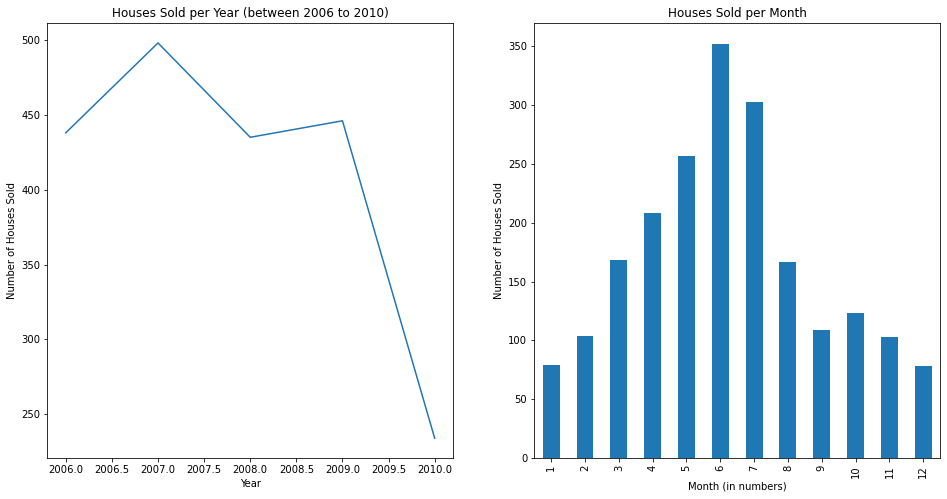

In [13]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
disc_df.yr_sold.value_counts().sort_index(ascending = True).plot.line(title = 'Houses Sold per Year (between 2006 to 2010)', 
                                                                              xlabel = 'Year',
                                                                              ylabel = 'Number of Houses Sold')

plt.subplot(1, 2, 2)
disc_df.mo_sold.value_counts().sort_index(ascending = True).plot(kind = 'bar', 
                                                                title = 'Houses Sold per Month', 
                                                                xlabel = 'Month (in numbers)', 
                                                                ylabel = 'Number of Houses Sold')


Between the observed time period (2006 to 2010), the year (2007) with most number of houses sold (498 units) is more than double the year (2010) with least number of houses sold (234 units). An initial suspicion is that this might be resultant from the aftermath of the subprime mortgage crisis which incepted in 2007, although finitive conclusions are reserved at this point. This will be further investigated in relation to the housing prices subsequently.  
  
Scaling down to months, it is apparent that more houses are sold in the spring-summer months of April to August relative to the winter months. As [*CRES*](https://www.cresinsurance.com/is-summer-a-hot-time-for-home-sales/) explains, summer is a "hot time" for home sales as houses are visually more appealing (greener lawns, sparkling pool etc.), families with school-going kids are not affected as the school term typically commences in fall and more daylight hours equates to longer window periods for real estate viewings. 


<div id="continuousvariables"></div>

##### Continuous Variables

In [14]:
# Create df for continuous variables (Sale price excluded as it is the target variable)
cont_df = train_raw_df[['lot_frontage', 
                        'lot_area', 
                        'mas_vnr_area',
                        'bsmtfin_sf_1',
                        'bsmtfin_sf_2',
                        'bsmt_unf_sf',
                        'total_bsmt_sf',
                        '1st_flr_sf',
                        '2nd_flr_sf',
                        'low_qual_fin_sf',
                        'gr_liv_area',
                        'garage_area', 
                        'wood_deck_sf',
                        'open_porch_sf', 
                        'enclosed_porch', 
                        '3ssn_porch', 
                        'screen_porch', 
                        'pool_area', 
                        'misc_val']]

cont_df.head()


,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val
0,NaN,13517,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,475.0,0,44,0,0,0,0,0
1,43.0,11492,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,559.0,0,74,0,0,0,0,0
2,68.0,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,246.0,0,52,0,0,0,0,0
3,73.0,9802,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,400.0,100,0,0,0,0,0,0
4,82.0,14235,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,484.0,0,59,0,0,0,0,0


In [15]:
# Summary statistics for continuous variables
cont_df.describe()


,lot_frontage,lot_area,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val
count,1721.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354
std,23.260653,6742.488909,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,7500.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,9430.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11513.500000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,159000.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000


A couple of observations on continuous variables:  
- There are a noticeable number of missing values across most columns, which will require addressing during data cleaning.  
- In terms of site area, the largest house (159000sqf) is 122 times the smallest house (1300sqf) although in terms of gross floor area, the difference between the house with most (5642sqf) and least (334sqf) above-grade livable space is much less stark at 17 times.  
- Astoundingly, the basement of the house with the largest basement (6110sqf) is even bigger than the livable are of the house with the largest livable space as highlighted in the preceding point. These observations point to the likelihood of outliers on the higher end.  
- Except for open porches with a non-zero median, more than half the houses in the data set do not have other types of porches (including wood deck) and pools. In fact, based on the 75th percentile, more than three-quarter of houses do not have an enclosed porch, 3 season porch, screen porch and pool.  

<AxesSubplot:>

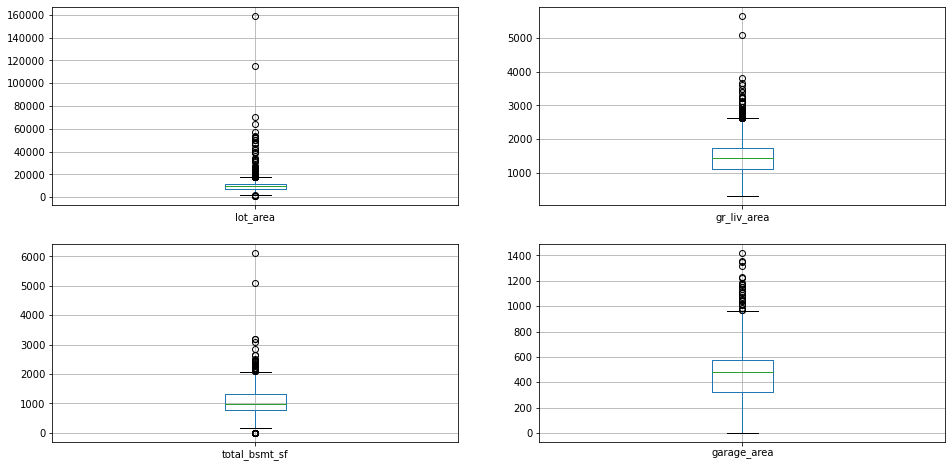

In [16]:
# As prompted by our observations, we take a closer look at selected more encompassing measurements of space
plt.figure(figsize = (16, 8))

plt.subplot(2, 2, 1)
cont_df.boxplot(column = 'lot_area')

plt.subplot(2, 2, 2)
cont_df.boxplot(column = 'gr_liv_area')

plt.subplot(2, 2, 3)
cont_df.boxplot(column = 'total_bsmt_sf')

plt.subplot(2, 2, 4)
cont_df.boxplot(column = 'garage_area')


As expected, there are outliers on the higher tail-end as shown by the multiple data points that are above the (Q3 + 1.5 * IQR) mark. Especially for site area, gross living area and total basement area, there are 2 data points each that are significantly higher. Nonetheless, we will retain these outliers for now and assess them in relation to the sale price. 


<div id="ordinalvariables"></div>

##### Ordinal Variables

In [17]:
# Create df for ordinal features
ordi_df = train_raw_df[['lot_shape', 
                        'utilities', 
                        'land_slope',
                        'overall_qual',
                        'overall_cond',
                        'exter_qual',
                        'exter_cond',
                        'bsmt_qual',
                        'bsmt_cond',
                        'bsmt_exposure',
                        'bsmtfin_type_1', 
                        'bsmtfin_type_2',
                        'heating_qc', 
                        'electrical', 
                        'kitchen_qual', 
                        'functional', 
                        'fireplace_qu', 
                        'garage_finish', 
                        'garage_qual', 
                        'garage_cond', 
                        'paved_drive', 
                        'pool_qc', 
                        'fence']]

ordi_df.head()


,lot_shape,utilities,land_slope,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,...,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,No,...,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN
1,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,No,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN
2,Reg,AllPub,Gtl,5,7,TA,Gd,TA,TA,No,...,SBrkr,Gd,Typ,NaN,Unf,TA,TA,Y,NaN,NaN
3,Reg,AllPub,Gtl,5,5,TA,TA,Gd,TA,No,...,SBrkr,TA,Typ,NaN,Fin,TA,TA,Y,NaN,NaN
4,IR1,AllPub,Gtl,6,8,TA,TA,Fa,Gd,No,...,SBrkr,TA,Typ,NaN,Unf,TA,TA,N,NaN,NaN


In [18]:
ordi_df.describe()


,overall_qual,overall_cond
count,2051.000000,2051.000000
mean,6.112140,5.562165
std,1.426271,1.104497
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,5.000000
75%,7.000000,6.000000
max,10.000000,9.000000


For ordinal features, there are only two features (i.e. overall quality, overall condition) that are already in numeric form. Hence, a major task during data cleaning would be to convert the non-numeric values to numeric values for further processing. Still, from the summary statistics, it seems to suggest that the values for overall quality and overall condition are generally evenly distributed, with the median and IQR hovering about the mid-points of the score reange (~5), and the min/max values corresponding to the lowest and highest scores for these features respectively. 


In [19]:
# We define a custom function to plot bar graphs for categorical data (part credit: eugeneyan)
def cat_bars(df, column_list):
    fig, ax = plt.subplots(int(np.ceil(len(column_list) / 4)), 4, figsize = (16, 24))
    ax = ax.ravel()
    for i, col in enumerate(column_list):
        sns.countplot(data = df, x = col, ax = ax[i])
        plt.setp(ax[i].get_xticklabels(), rotation = 90, fontsize = 10)
    if len(column_list) < 4 * int(np.ceil(len(column_list)/4)):
        for i in range(4 * int(np.ceil(len(column_list)/4)) - len(column_list)):
            ax[4 * int(np.ceil(len(column_list)/4)) - 1 - i].set_axis_off()
    fig.tight_layout()
        

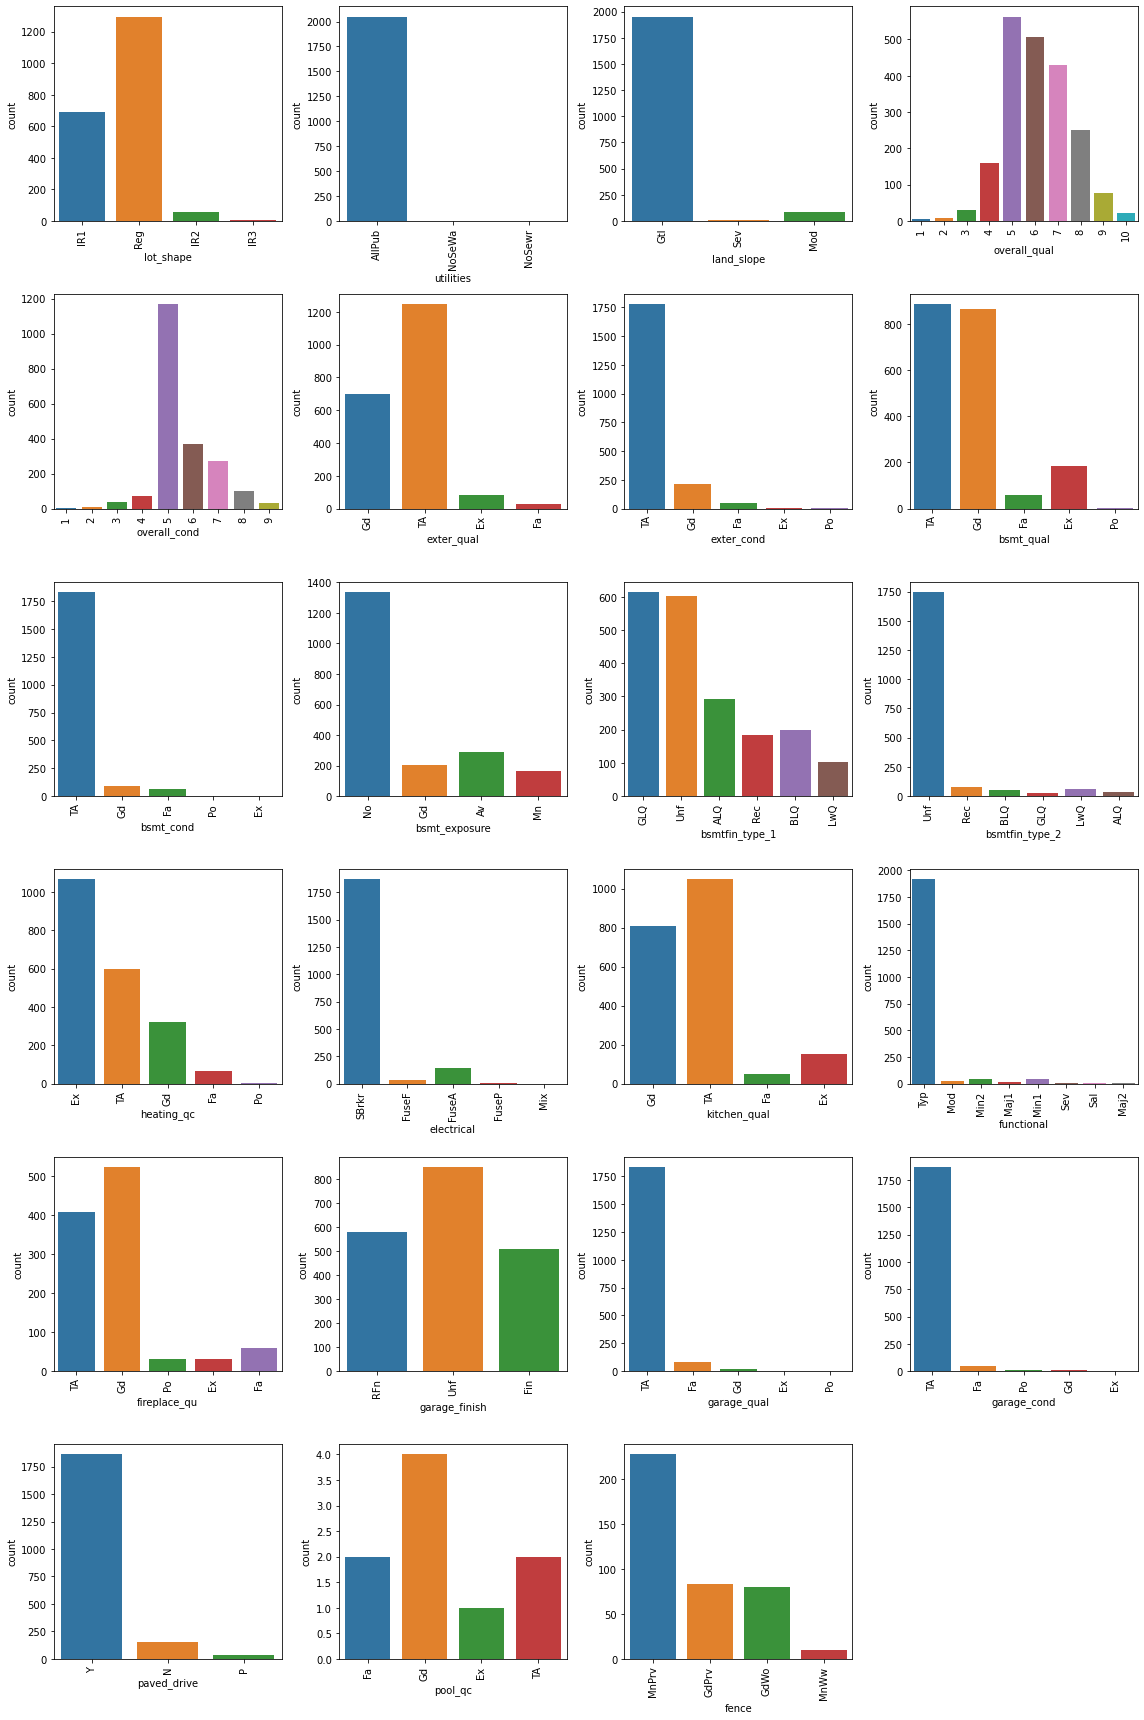

In [20]:
cat_bars(ordi_df, list(ordi_df.columns))


The countplots confirm that Overall quality and Overall condition are reasonably well distributed, with the median tapering towards the mean for the score range. There is a relatively even spread of counts for Garage finish and Basement finish type 1 while a number of other features are heavily skewed. On this point, nearly all houses sold are on gentle slope, have all public utilities and typical functionality, and come with typical/average garage conditions. This begs questions on the standards and consistency in data collection, as most ordinal features appear inclined towards selected counts. 


<div id="nominalvariables"></div>

##### Nominal Variables

In [21]:
# Create df for nominal features (PID excluded as it serves as an unique geo-identifier)
nomi_df = train_raw_df[['ms_subclass', 
                        'ms_zoning',
                        'street',
                        'alley',
                        'land_contour',
                        'lot_config',
                        'neighborhood',
                        'condition_1',
                        'condition_2',
                        'bldg_type', 
                        'house_style',
                        'roof_style', 
                        'roof_matl', 
                        'exterior_1st', 
                        'exterior_2nd', 
                        'mas_vnr_type', 
                        'foundation', 
                        'heating', 
                        'central_air', 
                        'garage_type', 
                        'misc_feature', 
                        'sale_type']]

nomi_df.head()


,ms_subclass,ms_zoning,street,alley,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,...,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,misc_feature,sale_type
0,60,RL,Pave,NaN,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,...,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD
1,60,RL,Pave,NaN,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NaN,WD
2,20,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,NaN,WD
3,60,RL,Pave,NaN,Lvl,Inside,Timber,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NaN,WD
4,50,RL,Pave,NaN,Lvl,Inside,SawyerW,Norm,Norm,1Fam,...,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,NaN,WD


In [22]:
nomi_df.describe()


,ms_subclass
count,2051.000000
mean,57.008776
std,42.824223
min,20.000000
25%,20.000000
50%,50.000000
75%,70.000000
max,190.000000


It is not meaningful to analyze the summary statistics for Ms subclass as it is used as an index for accompanying descriptions. 


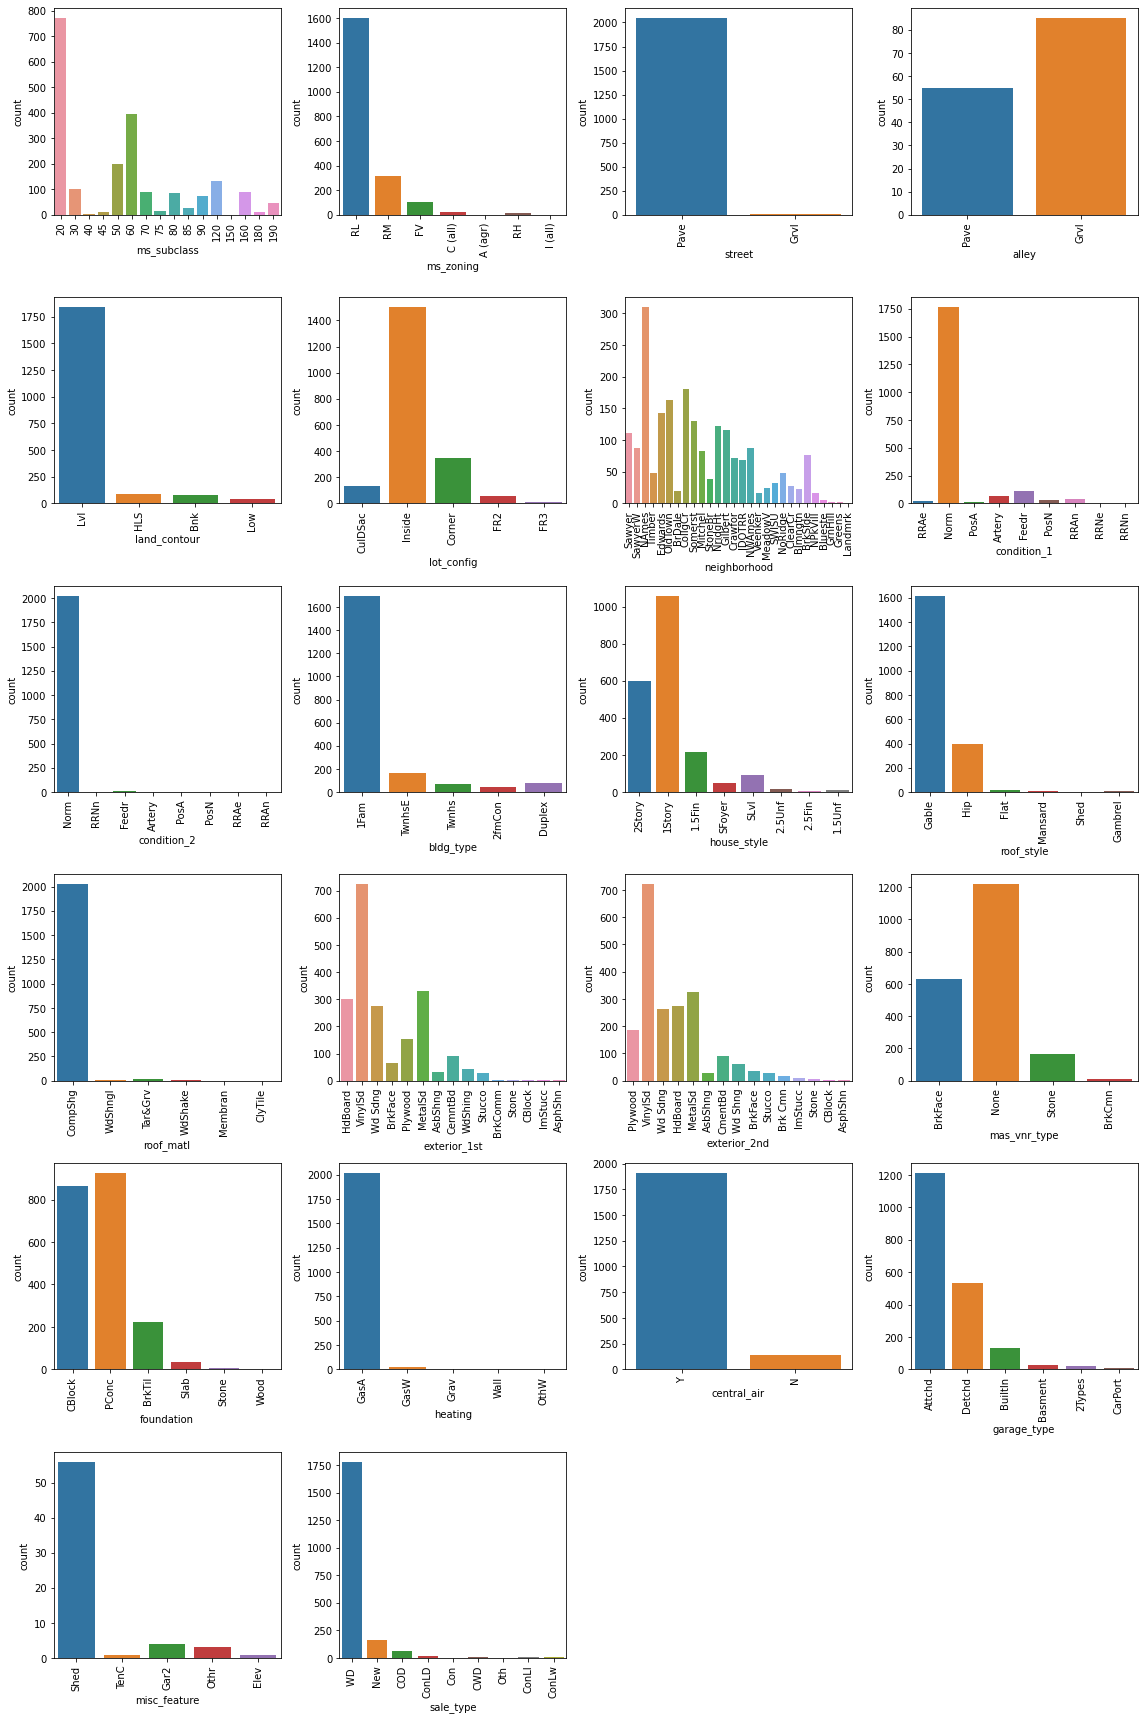

In [23]:
cat_bars(nomi_df, list(nomi_df.columns))


A similar trend of heavily skewed distributions is observed for multiple nominal features. To illustrate, almost all houses sold have paved vehicular acces from the street, near flat/level platform levels, standard (composite) shingle as the roof material and gas forced warm air furnace heating. As such, some nominal features will be dropped due to the sheer scarcity of non-modal datapoints in Part 2 Section 2.1.2, which equates to their effects on sale prices not being captured simply beacuse there is no basis for comparison. 

Another interesting note is the similarility in shape between Exterior 1st and Exterior 2nd, two related features according to the data description. This signals to a possibility of intercorrelation, and should be treated accordingly to prevent overfitting arising from multicollinearity. 


<div id="1.2.2"></div>

### 1.2.2 Examine Target Variable (Sale Price)

Lastly, we examine at the sale price feature, which is the target variable (i.e. y) our model attempts to predict. Based on checks above, there are no missing values and the data type (int) is acceptable as the prices have been rounded up to the nearest whole number. 


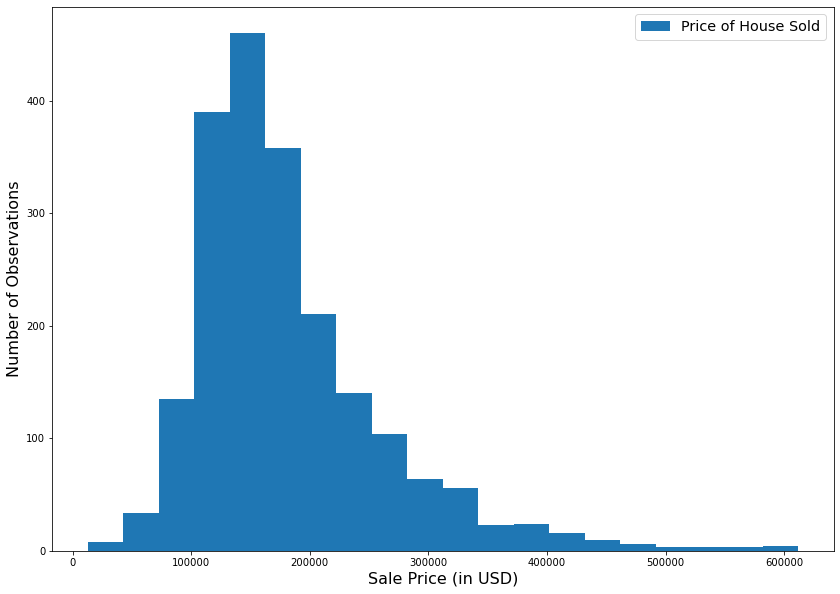

In [24]:
# Histogram of sale price
fig, ax = plt.subplots(figsize = (14, 10))

ax.hist(train_raw_df.saleprice, label = 'Price of House Sold', bins = 20)

ax.set_ylabel('Number of Observations', size = 16)
ax.set_xlabel('Sale Price (in USD)', size = 16)

ax.legend(fontsize = 'x-large')

plt.show()


As the data is slightly skewed right, we apply the log function on sale price for a more normal distribution. From the graph, a good number of houses are sold between USD100,000 and USD200,000. 


In [25]:
train_raw_df['log_saleprice'] = np.log(train_raw_df['saleprice'])


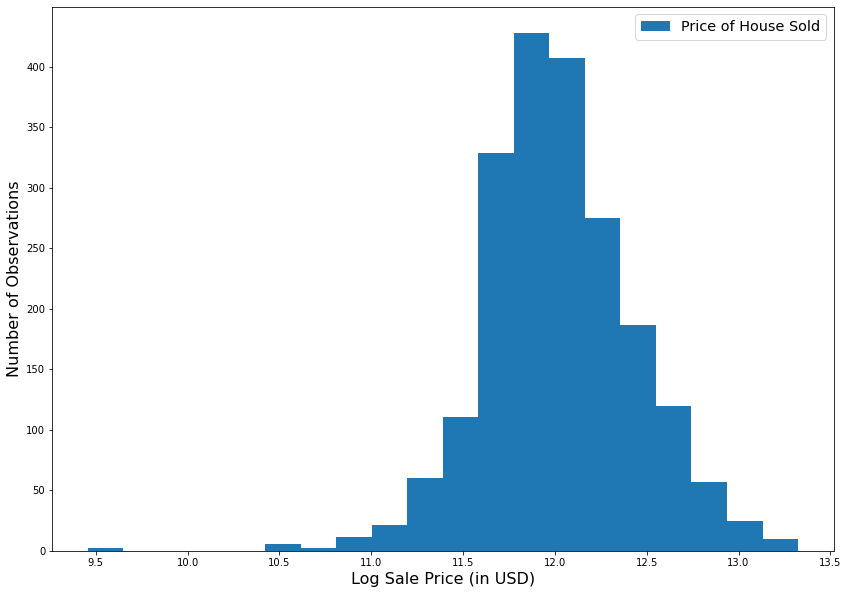

In [26]:
# Histogram of log(sale price)
fig, ax = plt.subplots(figsize = (14, 10))

ax.hist(train_raw_df.log_saleprice, label = 'Price of House Sold', bins = 20)

ax.set_ylabel('Number of Observations', size = 16)
ax.set_xlabel('Log Sale Price (in USD)', size = 16)

ax.legend(fontsize = 'x-large')

plt.show()


Once the outlier at log sale price 9.5 is removed, the data wil achieve a closer spread to normal distribution. As log_saleprice will be more effective in prediction modelling, the feature will be retained and used for comparisons with predictor variables. 


In [27]:
# Summary statistics for Ames housing prices
train_raw_df.saleprice.describe()


count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

From the summary statistics for Ames housing prices, the median sale price is USD162,500 and an arguably more significant note is the flucation in min (USD12,789) and max (USD611,657). 


<AxesSubplot:title={'center':'Median Housing Price in Ames'}, xlabel='Year', ylabel='House Price (in USD)'>

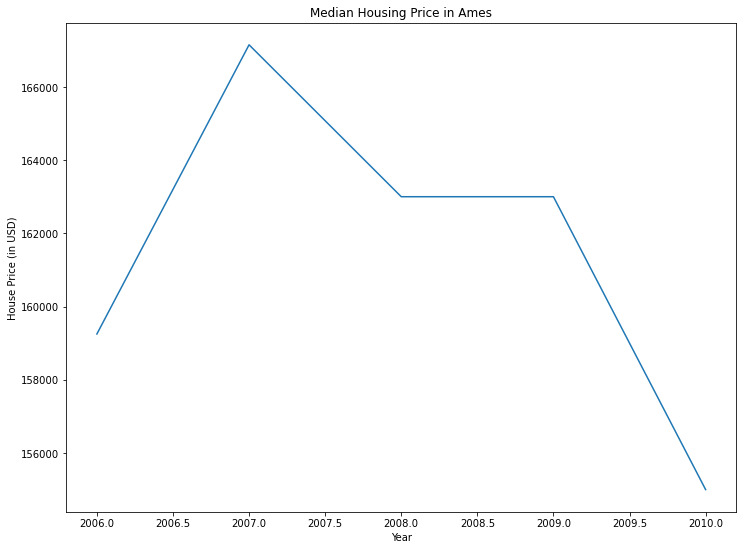

In [28]:
# Lineplot for median housing prices in Ames
plt.figure(figsize = (12, 9))

train_raw_df.groupby('yr_sold')['saleprice'].median().plot.line(title = 'Median Housing Price in Ames', 
                                                                xlabel = 'Year', 
                                                                ylabel = 'House Price (in USD)')


As seen, housing sale prices in Ames was on the rise from 2006 to 2007, and plunged from then till 2010. 

<img src = " ../images/us_house_prices.png" alt = "us_house_prices"/>

*Fig 1.2 Median US House Prices (in USD)* ([*Source*](https://dqydj.com/historical-home-prices/))


In comparison to the nationwide scale with reference to Fig. 1.2 above, a similar trend can be observed for housing sale prices across US, where it peaked at about USD220,000 in 2006 followed by a sharp crash to about USD170,000 in 2010. A noteworthy difference is that housing price bubble burst for Ames (2007) was slightly delayed as compared to the rest of the country in entirety (2006). Regardless, the changes in median housing prices for Ames generally corresponded with the trend at the nationwide scale, which may be attributed to the [*US subprime mortgage crisis*](https://www.thebalance.com/subprime-mortgage-crisis-effect-and-timeline-3305745). 


<div id="section3"></div>

### Section 3 (Data Cleaning)

With the insights from the preliminary EDA in the preceding section, Section 3 focusses on data cleaning. First, outliers will be assessed and removed accordingly if deemed appropriate. Second, missing values will be addressed based on variable specificities and context. Third, feature types/forms will be converted for further pre-proessing and engineering, where necessary. 



In [29]:
# Reprinting.info() and .head() and for reference
train_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [30]:
train_raw_df.head(10)


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,11.838626
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,190000,12.154779
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,New,140000,11.849398
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,5,2010,COD,142000,11.863582
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,400,6,2007,WD,112500,11.630709
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,9,2007,WD,135000,11.813030


<div id="1.3.1"></div>

#### 1.3.1 Outliers

Following the recommendation in the special notes section of the data documentation, properties with living area greater than 4,000sqf are identified declared as outliers and should be removed. 


In [31]:
train_raw_df = train_raw_df.drop(train_raw_df.loc[train_raw_df.gr_liv_area > 4000].index)

train_raw_df.shape # 2 houses with gross living area more than 4,000sqf have been removed


(2049, 82)

Adopting the same formula above (Q1/Q3 -+ 1.5 * IQR) to identify outliers, we create custom function ([*part credit*](https://stackoverflow.com/questions/58624406/how-to-write-user-defined-function-in-pandas-for-outliers)) and apply it to sale price, lot area, gross living area, total basement area and garage area. More attention is paid to these features as they are the larger measures of space. 


In [32]:
def outlier(df, col): 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_out = df[col][(df[col] < (Q1 - 1.5 * IQR))]
    high_out = df[col][(df[col] > (Q3 + 1.5 * IQR))]
    total_out = df[col][(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print("There are " + str(low_out.count()) + " low outliers and " + str(high_out.count()) + " high outliers.") 
    return(pd.DataFrame(total_out))


In [33]:
outlier(train_raw_df, 'saleprice')


There are 0 low outliers and 94 high outliers.


,saleprice
22,344133
41,465000
68,372000
81,501837
99,350000
...,...
1970,348000
2002,372402
2029,425000
2041,412500


In [34]:
outlier(train_raw_df, 'lot_area')


There are 6 low outliers and 84 high outliers.


,lot_area
12,26400
24,34650
53,1476
62,20062
71,23730
...,...
1960,21533
1964,51974
1965,22136
2028,20781


In [35]:
outlier(train_raw_df, 'gr_liv_area')


There are 0 low outliers and 62 high outliers.


,gr_liv_area
52,2784
99,2726
125,2944
138,3390
151,2868
...,...
1897,3672
1930,2630
1939,3493
1965,2640


In [36]:
outlier(train_raw_df, 'total_bsmt_sf')


There are 54 low outliers and 30 high outliers.


,total_bsmt_sf
12,0.0
30,2524.0
81,2216.0
93,0.0
114,0.0
...,...
1933,0.0
1934,2200.0
1964,2660.0
1965,2171.0


In [37]:
outlier(train_raw_df, 'garage_area')


There are 0 low outliers and 24 high outliers.


,garage_area
81,1166.0
178,983.0
194,968.0
199,968.0
230,1052.0
332,1150.0
337,1356.0
526,1085.0
613,1017.0
682,1220.0


From the univariate analysis of the selected features above, there is a clear trend of high outliers except for total basement area (probably due to null values). Nonetheless, although there are a significant number of outliers across these features, we cannot confidently drop the observations as the maximum values are still considered possible and believable (e.g. lot area of 159,000sqf). Instead, we plot the features against sale price to determine if any of these outlier datapoints should be removed. 

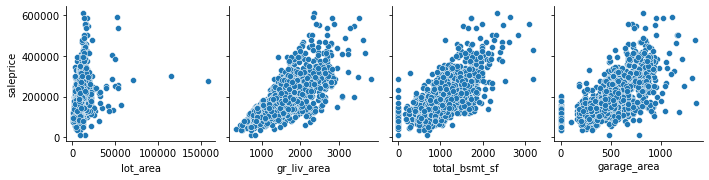

In [38]:
sns.pairplot(data = train_raw_df, x_vars = ['lot_area', 'gr_liv_area', 'total_bsmt_sf', 'garage_area'], y_vars = ['saleprice'])


There are no clear outliers in the scatter plots for gross living area, total basement area and garage area vis-a-vis sale price. However, there are 2 additional outliers (> 100,000sqf) for lot area which we will proceed to remove. 


In [39]:
train_raw_df = train_raw_df.drop(train_raw_df.loc[train_raw_df.lot_area > 100000].index)

train_raw_df.shape # 2 houses with lot area more than 100,000sqf have been removed


(2047, 82)

<div id="1.3.2"></div>

#### 1.3.2 Missing Values

To aid our data cleaning for missing values, we leverage on the missingno library. First, we remove columns with more than 50% of data missing as retaining them is translated to analyzing based on less than half of the total sample, which will likely result in false conclusions drawn especially if the missing datapoints are vastly different. Second, with the help of a custom function in the cell below inspired by [*eugeneyan*](https://git.generalassemb.ly/eugeneyan/Project-2-Ames-Housing-Data-Analysis/blob/master/code/01_Cleaning_and_EDA.ipynb), we peruse the features progressively and imput missing values while converting ordinal/nominal data to numeric values simultaneously. This approach is favoured over processing by value types (i.e. discrete, continuous, ordinal, nominal) as it allows for related features to be concurrently assessed, in most cases revealing clues on the appropriate treatment for the missing value. 


In [40]:
# Custom function to fill missing values (if applicable) and map categorical data to numeric values: 
def fill_map(col, replace_na_value, ord_dict, data = train_raw_df):
    if replace_na_value is not None:
        result = data.loc[:, col].fillna(replace_na_value)
    else: 
        result = data.loc[:, col]
    result = result.replace(ord_dict)
    return result


<div id="cwofvm"></div>

##### Columns with Over Half Values Missing

In [42]:
import missingno as msno


<AxesSubplot:>

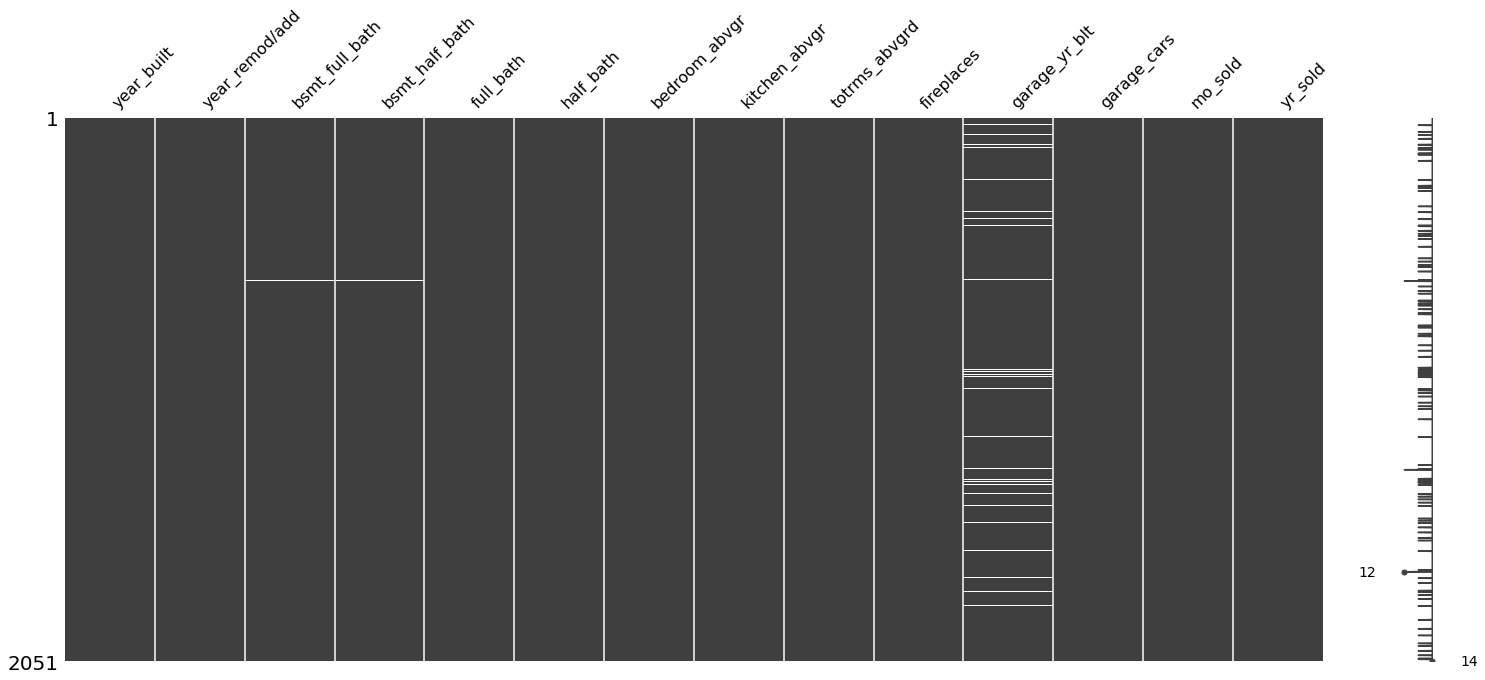

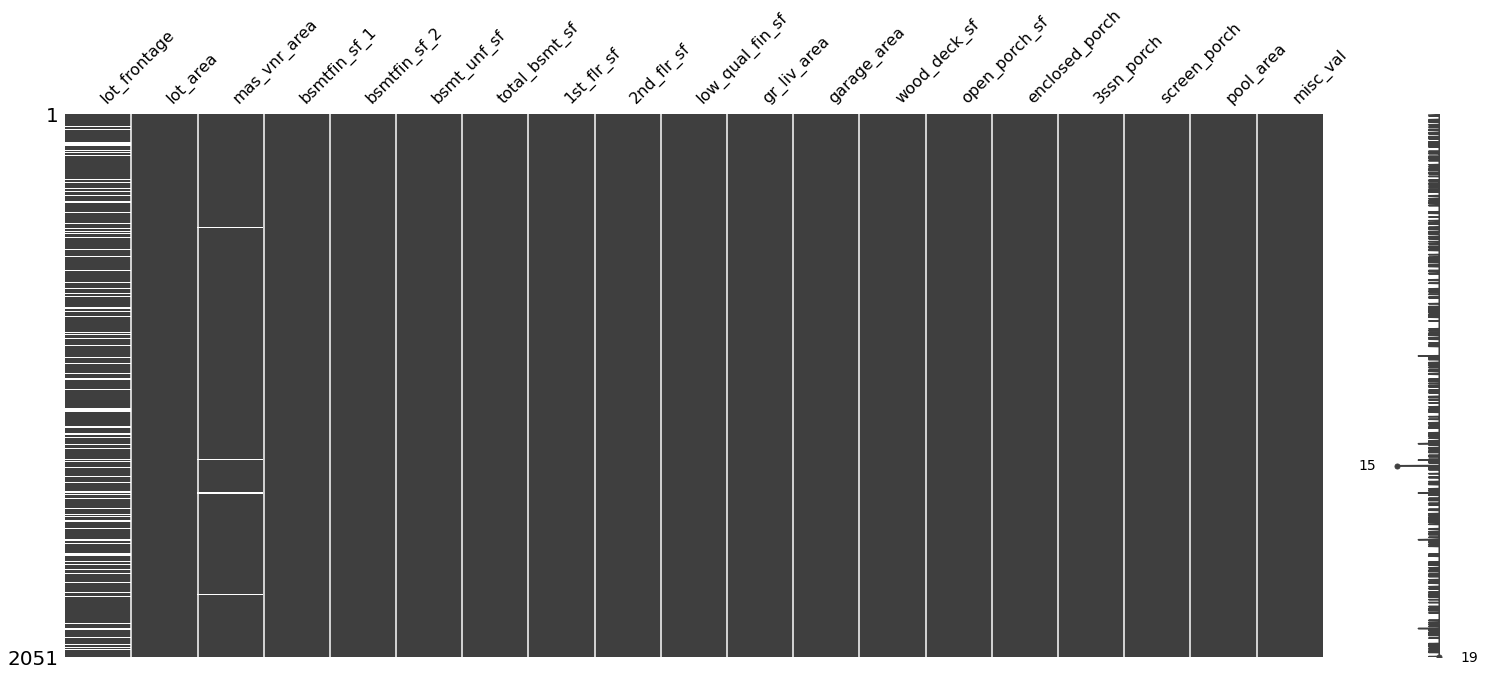

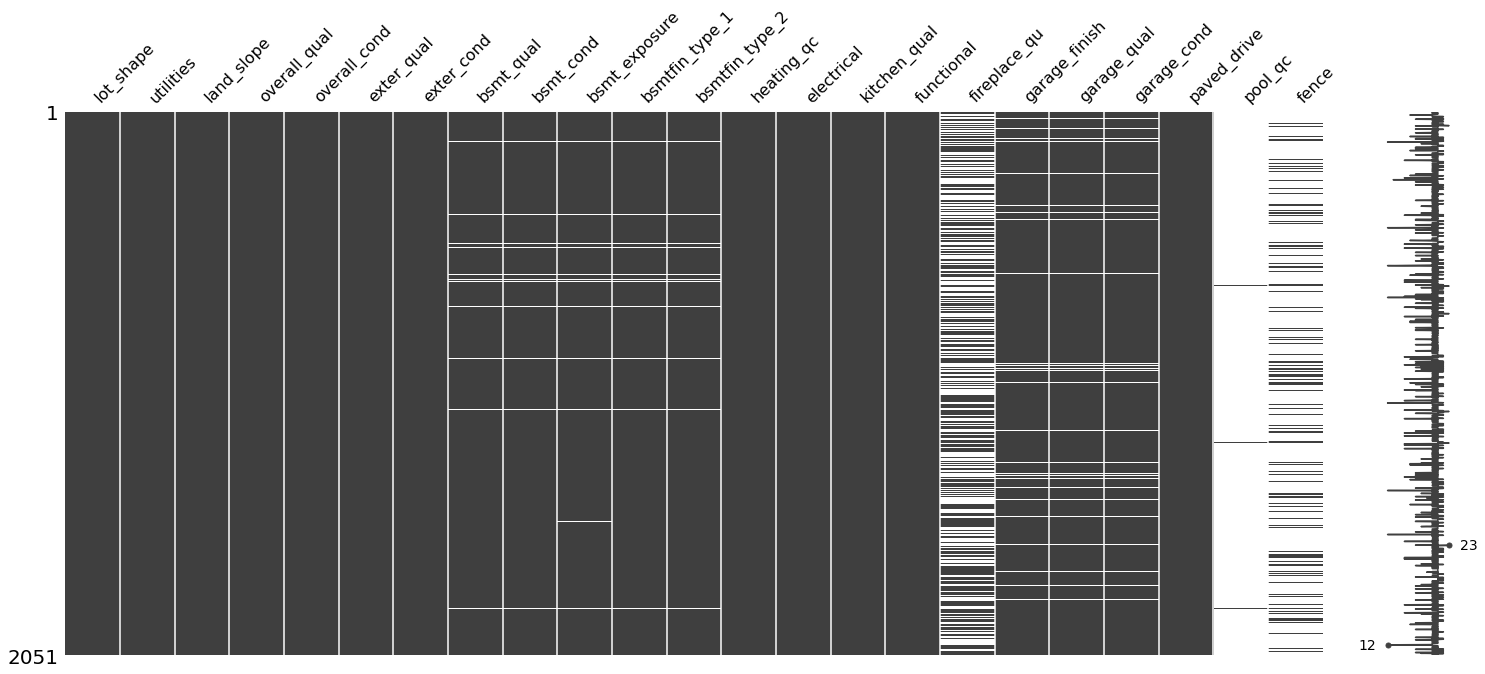

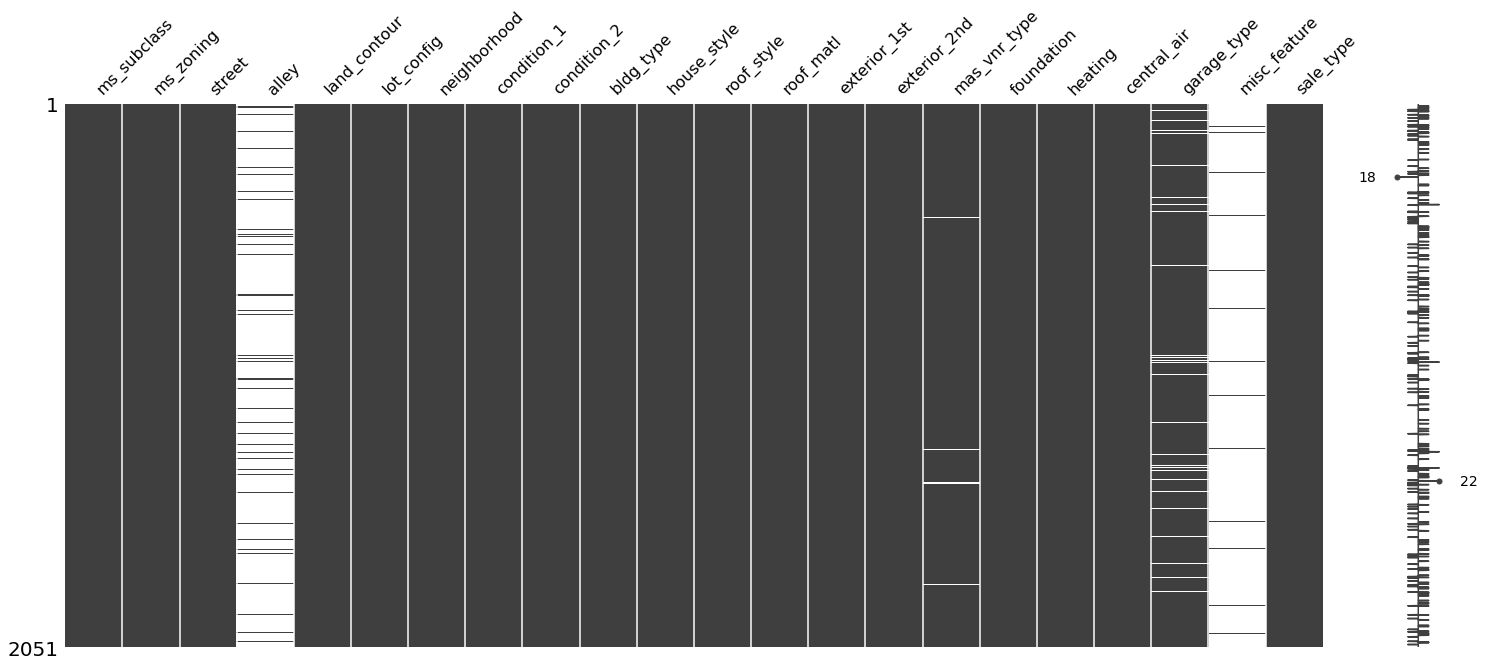

In [46]:
# For the matrix function, we will use the dataframes created for discrete, continuous, ordinal and nominal varaibles. 
 # The main train_df is too large for meaningful visualization. 
msno.matrix(disc_df)
msno.matrix(cont_df)
msno.matrix(ordi_df)
msno.matrix(nomi_df)


From the matrices, nominal variables followed by ordinal variables have columns with most number of missing values. The dataset for discrete and continuous variables are mostly in tact. 

<AxesSubplot:>

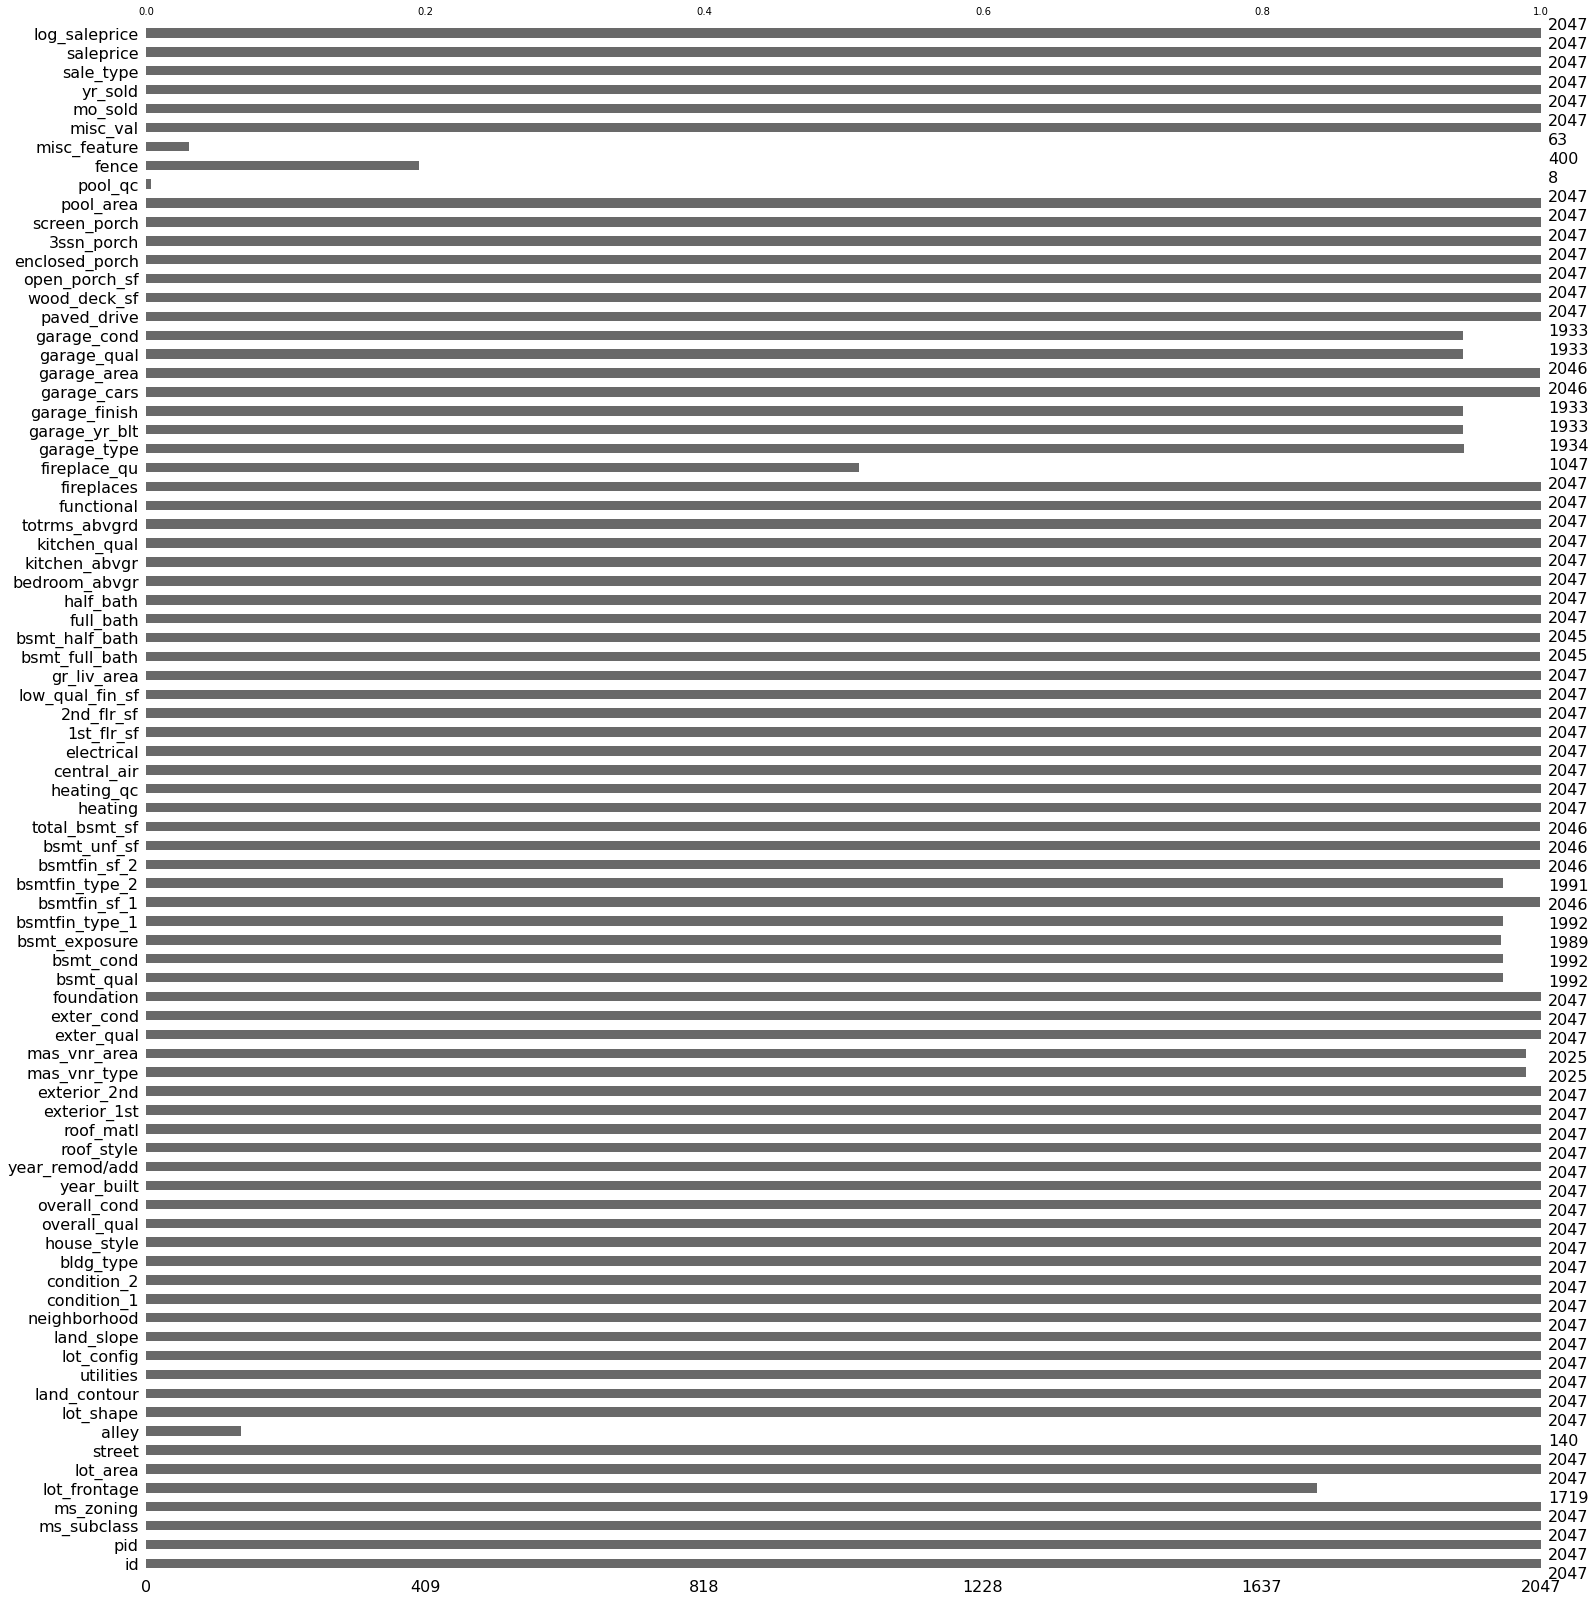

In [47]:
# Use bar function for an overview. 
msno.bar(train_raw_df)


From the bar graph above, there is a significant number of missing values for misc. features, fence, pool quality and alley. The number of missing values for fireplace quality warrants attention too. 

In [43]:
# To confirm our assessment, we compute the % of missing values for each column. 
missing_count = train_raw_df.isnull().sum()
perc_missing = round(((train_raw_df.isnull().sum() * 100) / len (train_raw_df)), 2)
perc_missing_df = pd.DataFrame({'Missing Count': missing_count, 'Percentage of Missing Values (%)': perc_missing})

pd.set_option('display.max_rows', None)
perc_missing_df.sort_values(by = 'Percentage of Missing Values (%)', ascending = False)


,Missing Count,Percentage of Missing Values (%)
pool_qc,2039,99.61
misc_feature,1984,96.92
alley,1907,93.16
fence,1647,80.46
fireplace_qu,1000,48.85
lot_frontage,328,16.02
garage_cond,114,5.57
garage_yr_blt,114,5.57
garage_finish,114,5.57
garage_qual,114,5.57


The table confirmed our assessment, whereby there are significant number of missing values for pool quality (99.61%), misc. feature (96.88%), alley (93.17%) and fence (80.48%), with fireplace quality at slightly below 50%. Hence, we will proceed to only drop pool quality, misc. feature, alley and fence. 


In [44]:
train_raw_df = train_raw_df.drop(columns = ['pool_qc', 'misc_feature', 'alley', 'fence'])

train_raw_df.shape # 4 columns dropped accordingly


(2047, 78)

<div id="lotfrontage"></div>

##### Lot Frontage

For missing lot frontage values, we compare against lot area to check if there is scope for regression imputation, as both features are related. Otherwise, we will default to imputing mean/median/mode. 



In [45]:
# Number of lot frontage values missing
train_raw_df.lot_frontage.isnull().sum()


328

Text(0, 0.5, 'Lot Frontage (in ft)')

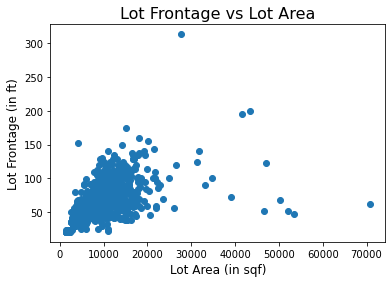

In [46]:
# Scatterplot for lot area vs lot frontage
plt.scatter(train_raw_df['lot_area'], train_raw_df['lot_frontage'])

plt.title("Lot Frontage vs Lot Area", size = 16)
plt.xlabel("Lot Area (in sqf)", size = 12)
plt.ylabel("Lot Frontage (in ft)", size = 12)


In [47]:
train_raw_df[['lot_area', 'lot_frontage']].corr()


,lot_area,lot_frontage
lot_area,1.000000,0.541488
lot_frontage,0.541488,1.000000


As lot frontage only shares a moderate positive linear correlation to lot area, we will not adopt the latter as the sole variable to approximate the former via regression imputation. A choice now has to be made between mean, median and mode imputation for missing values. 


<AxesSubplot:>

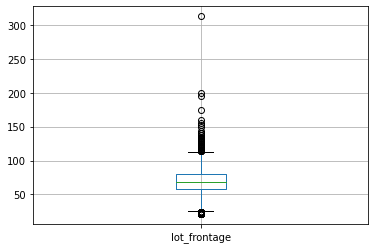

In [48]:
train_raw_df.boxplot(column = 'lot_frontage')


In [49]:
train_raw_df.lot_frontage.value_counts()


60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
90.0      31
74.0      31
72.0      30
62.0      28
68.0      28
73.0      25
100.0     23
82.0      21
52.0      20
57.0      20
43.0      20
66.0      19
79.0      19
67.0      18
53.0      18
59.0      18
51.0      16
76.0      16
88.0      16
56.0      15
84.0      14
69.0      14
81.0      14
55.0      14
58.0      13
92.0      13
35.0      13
71.0      13
40.0      13
91.0      13
44.0      12
96.0      11
95.0      11
34.0      11
48.0      11
77.0      11
41.0      11
30.0      11
61.0      10
83.0      10
93.0       9
105.0      9
110.0      9
107.0      9
42.0       8
45.0       8
120.0      8
94.0       8
87.0       8
86.0       7
98.0       7
102.0      7
32.0       6
89.0       6
54.0       6
37.0       6
47.0       6
36.0       5
103.0      5
39.0       4
129.0      4
108.0      4
38.0       4
114.0      4
109.0      4

As there numerous outliers for lot frontage as seen in the boxplot above, we will narrow down to either median or mode imputation. Based on the value counts, as there is a clear highest frequency lot frontage (60ft) that is roughly double the next highest three frequencies (70ft, 80ft, 50ft), we will use mode imputation. 


In [50]:
# Using simpleimputer to mode imputation for missing values in lot frontage column
sim_imp = SimpleImputer(strategy = 'most_frequent')
train_raw_df['lot_frontage'] = sim_imp.fit_transform(pd.DataFrame(train_raw_df['lot_frontage']))
train_raw_df['lot_frontage'].mean()

train_raw_df.lot_frontage.isnull().sum() # Missing values for lot frontage successfully imputed


0

<div id="veneerfeatures"></div>

##### Veneer Features

Similar to houses with no veneer, we first fill mas_vnr_type with 'None' as we cannot ascertain the veneer type, if any. 


In [51]:
# Number of masonry veneer type data missing
train_raw_df.mas_vnr_type.isnull().sum()


22

In [52]:
# Fillna for mas_vnr_type with 'None'
train_raw_df.mas_vnr_type.fillna(value = 'None', inplace = True)

train_raw_df.mas_vnr_type.isnull().sum() # Missing values for masonry veneer type successfully filled with 'None'


0

Next, we assess null values for mas_vnr_area with respect to mas_vnr_type. 


In [53]:
# Number of masonry veneer area data missing
train_raw_df.mas_vnr_area.isnull().sum()


22

In [54]:
vnr_df = train_raw_df.loc[: , ['mas_vnr_area', 'mas_vnr_type']]

vnr_df[vnr_df.mas_vnr_area.isnull()]


,mas_vnr_area,mas_vnr_type
22,NaN,None
41,NaN,None
86,NaN,None
212,NaN,None
276,NaN,None
338,NaN,None
431,NaN,None
451,NaN,None
591,NaN,None
844,NaN,None


As the 22 null datapoints for mas_vnr_area corresponds with houses without mas_vnr_type which we filled above, we proceed to fill the null datapoints for mas_vnr_area with zero on the basis that the houses do not have masonry veneer to begin with. 


In [55]:
train_raw_df.mas_vnr_area.fillna(value = 0.0, inplace = True)

train_raw_df.mas_vnr_area.isnull().sum() # Missing values for masonry veneer area successfully filled with 0.0


0

<div id="basementfeatures"></div>

##### Basement Features

For a better overview of basement features, we create a new dataframe isolating basement features to study possible links. 


In [56]:
basement_df = train_raw_df.loc[: , ['total_bsmt_sf',
                                    'bsmtfin_sf_1', 
                                    'bsmtfin_sf_2', 
                                    'bsmt_unf_sf', 
                                    'bsmt_qual', 
                                    'bsmt_cond', 
                                    'bsmt_exposure', 
                                    'bsmtfin_type_1', 
                                    'bsmtfin_type_2', 
                                    'bsmt_full_bath', 
                                    'bsmt_half_bath']]

basement_df.isnull().sum()


total_bsmt_sf      1
bsmtfin_sf_1       1
bsmtfin_sf_2       1
bsmt_unf_sf        1
bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_type_2    56
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [57]:
basement_df[basement_df.isnull().any(axis = 1)]


,total_bsmt_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_full_bath,bsmt_half_bath
12,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
93,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
146,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
183,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
240,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
249,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
256,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
390,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
437,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


From the table above, all houses surfaced do not have basements except houses 1147, 1456, 1595 and 1997.  
- First and foremost, for these houses with basements, we will fill the accompanying ordinal features using mode imputation as it is a categorical variable. 
- Second, for house 616, we fill the bsmt_full_bath	and bsmt_half_bath since the house has no basement. We apply the same treatment to house 1327, in addition to filling basement space related features with zero. 
- Third, we will tackle the ordinal features (bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, smtfin_type_2) using the custom fill_map function. The null values will be replaced with NA (signifying no basement as per the data documentation) before conversion to numeric form (i.e 0). 


In [58]:
# Determine mode for bsmt_exposure and bsmtfin_type_2 using value counts
print(basement_df.bsmt_exposure.value_counts())
print("")
print(basement_df.bsmtfin_type_2.value_counts())


No    1339
Av     288
Gd     199
Mn     163
Name: bsmt_exposure, dtype: int64

Unf    1745
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


In [59]:
# Fill house 1147
train_raw_df.loc[1147, 'bsmtfin_type_2'] = 'Unf'


In [60]:
# Fill house 1456
train_raw_df.loc[1456, 'bsmt_exposure'] = 'No'


In [61]:
# Fill house 1547
train_raw_df.loc[1547, 'bsmt_exposure'] = 'No'


In [62]:
# Fill house 1997
train_raw_df.loc[1997, 'bsmt_exposure'] = 'No'


In [63]:
# Fill house 616
train_raw_df.loc[616, 'bsmt_full_bath'] = 0.0
train_raw_df.loc[616, 'bsmt_half_bath'] = 0.0


In [64]:
# Fill house 1327
train_raw_df.loc[1327, 'bsmt_full_bath'] = 0.0
train_raw_df.loc[1327, 'bsmt_half_bath'] = 0.0
train_raw_df.loc[1327, 'total_bsmt_sf'] = 0.0
train_raw_df.loc[1327, 'bsmtfin_sf_1'] = 0.0
train_raw_df.loc[1327, 'bsmtfin_sf_2'] = 0.0
train_raw_df.loc[1327, 'bsmt_unf_sf'] = 0.0


In [65]:
# Fill and map basement quality
train_raw_df['bsmt_qual'] = fill_map('bsmt_qual', 'NA', {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

train_raw_df.bsmt_qual.head() # Fill and map for basement quality successful


0    3
1    4
2    3
3    4
4    2
Name: bsmt_qual, dtype: int64

In [66]:
# Fill and map basement condition
train_raw_df['bsmt_cond'] = fill_map('bsmt_cond', 'NA', {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

train_raw_df.bsmt_cond.head() # Fill and map for basement condition successful


0    3
1    3
2    3
3    3
4    4
Name: bsmt_cond, dtype: int64

In [67]:
# Fill and map basement exposure
train_raw_df['bsmt_exposure'] = fill_map('bsmt_exposure', 'NA', {'NA': 0,'No': 1,'Mn': 2,'Av': 3,'Gd': 4})

train_raw_df.bsmt_exposure.head() # Fill and map for basement exposure successful


0    1
1    1
2    1
3    1
4    1
Name: bsmt_exposure, dtype: int64

In [68]:
# Fill and map basement finish type 1
train_raw_df['bsmtfin_type_1'] = fill_map('bsmtfin_type_1', 'NA', {'NA': 0,'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6})

train_raw_df.bsmtfin_type_1.head() # Fill and map for basement finish type 1 successful


0    6
1    6
2    6
3    1
4    1
Name: bsmtfin_type_1, dtype: int64

In [69]:
# Fill and map basement finish type 2
train_raw_df['bsmtfin_type_2'] = fill_map('bsmtfin_type_2', 'NA', {'NA': 0,'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6})

train_raw_df.bsmtfin_type_2.head() # Fill and map for basement finish type 2 successful


0    1
1    1
2    1
3    1
4    1
Name: bsmtfin_type_2, dtype: int64

In [70]:
# To double check that data cleaning for basement features is successful, we recreate basement_df with the same (revised) features
basement_df = train_raw_df.loc[: , ['total_bsmt_sf',
                                    'bsmtfin_sf_1', 
                                    'bsmtfin_sf_2', 
                                    'bsmt_unf_sf', 
                                    'bsmt_qual', 
                                    'bsmt_cond', 
                                    'bsmt_exposure', 
                                    'bsmtfin_type_1', 
                                    'bsmtfin_type_2', 
                                    'bsmt_full_bath', 
                                    'bsmt_half_bath']]

basement_df.isnull().sum() # All null values for basement features addressed


total_bsmt_sf     0
bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

In [71]:
basement_df.head() # Ordinal variables successfully converted to numeric form


,total_bsmt_sf,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_full_bath,bsmt_half_bath
0,725.0,533.0,0.0,192.0,3,3,1,6,1,0.0,0.0
1,913.0,637.0,0.0,276.0,4,3,1,6,1,1.0,0.0
2,1057.0,731.0,0.0,326.0,3,3,1,6,1,1.0,0.0
3,384.0,0.0,0.0,384.0,4,3,1,1,1,0.0,0.0
4,676.0,0.0,0.0,676.0,2,4,1,1,1,0.0,0.0


<div id="fireplacequality"></div>

##### Fireplace Quality

A quick check is done to determine if the missing values for fireplace_quality correspond with houses without fireplace. 

In [72]:
# Number of fireplace quality data missing
train_raw_df.fireplace_qu.isnull().sum()


1000

In [73]:
train_raw_df[(train_raw_df.fireplace_qu).isnull() & (train_raw_df.fireplaces != 0)]


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice


As shown, houses with missing datapoints for fireplace quality indeed do not have at least one fireplace to start with. Hence, we will fill these missing datapoints with 'NA' which indicates there is no fireplace as per the data documentation, at the same time converting non-missing values to numeric form using the custom built function. 


In [74]:
train_raw_df['fireplace_qu'] = fill_map('fireplace_qu', 'NA', {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

train_raw_df.fireplace_qu.head() # Fill and map for fireplace qualit successful


0    0
1    3
2    0
3    0
4    0
Name: fireplace_qu, dtype: int64

<div id="garagefeatures"></div>

##### Garage Features

Taking a similar approach to basement features, we create a new dataframe to study possible links between garage features. 


In [75]:
garage_df = train_raw_df.loc[: , ['garage_type', 
                                  'garage_yr_blt', 
                                  'garage_finish',
                                  'garage_cars',
                                  'garage_area',
                                  'garage_qual',
                                  'garage_cond']]

garage_df.isnull().sum()


garage_type      113
garage_yr_blt    114
garage_finish    114
garage_cars        1
garage_area        1
garage_qual      114
garage_cond      114
dtype: int64

In [76]:
train_raw_df.garage_type.value_counts()

Attchd     1209
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [77]:
garage_df[garage_df.isnull().any(axis = 1)]


,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN
103,NaN,NaN,NaN,0.0,0.0,NaN,NaN
114,NaN,NaN,NaN,0.0,0.0,NaN,NaN
120,NaN,NaN,NaN,0.0,0.0,NaN,NaN
134,NaN,NaN,NaN,0.0,0.0,NaN,NaN
136,NaN,NaN,NaN,0.0,0.0,NaN,NaN


From the table above, it is quite clear that all houses do not garages except house 1712 which will be further scrutinized. 
- First, as stated in [*1.2.1 Preliminary Dataset Inspection - Discrete Variables*](#discretevariables),the house with garage built year of 2027 is identified and corrected to 2007. 
- Second, on the basis that a garage was observed but details not recorded down for house 1712, we impute values for garage cars and garage area using Nearest Neighbors algorithm, and fill remaining features using mode imputation.  
- Third, we fill missing values for garage type (nominal) with 'NA' as per the data documentation to indicate there are no garages.  
- Lastly, we run the ordinal features (garage_finish, garage_qual, garage_cond) using the custom fill_map function. The null values will be replaced with NA (signifying no garage as per the data documentation) before conversion to numeric form (i.e 0). 


In [78]:
# Identify house with wrongly entered garage built year and correct accordingly
train_raw_df[(train_raw_df.garage_yr_blt == 2207)]


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,...,0,0,0,0,0,9,2007,New,267300,12.496127


In [79]:
# Change to the likely correct year (2007)
train_raw_df.loc[1699, 'garage_yr_blt'] = 2007

train_raw_df[(train_raw_df.garage_yr_blt == 2207)] # Amended successfully


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice


In [80]:
print(train_raw_df.garage_cars.mean())
print(train_raw_df.garage_area.mean())


1.7756598240469208
472.78934506353863


In [81]:
# Generate KNNimputer function
knn_imp = KNNImputer()


In [82]:
# KNNimpute garage_cars for house 1712, rounded up to nearest integer
train_raw_df['garage_cars'] = knn_imp.fit_transform(pd.DataFrame(train_raw_df['garage_cars'])).round()

train_raw_df['garage_cars'].mean()


1.7757694186614559

In [83]:
# KNNimpute garage_area for house 1712, rounded up to nearest integer
train_raw_df['garage_area'] = knn_imp.fit_transform(pd.DataFrame(train_raw_df['garage_area'])).round()

train_raw_df['garage_area'].mean()


472.7894479726429

In [84]:
# Determine mode for garage_finish, garage_qual and garage_cond, limited to detached garages
print(train_raw_df[(train_raw_df.garage_type == 'Detchd')].garage_finish.value_counts())
print("")
print(train_raw_df[(train_raw_df.garage_type == 'Detchd')].garage_qual.value_counts())
print("")
print(train_raw_df[(train_raw_df.garage_type == 'Detchd')].garage_cond.value_counts())


Unf    497
RFn     24
Fin     14
Name: garage_finish, dtype: int64

TA    467
Fa     60
Ex      3
Gd      3
Po      2
Name: garage_qual, dtype: int64

TA    483
Fa     43
Po      6
Ex      2
Gd      1
Name: garage_cond, dtype: int64


In [85]:
# Fill house 1712
train_raw_df.loc[1712, 'garage_finish'] = 'Unf'
train_raw_df.loc[1712, 'garage_qual'] = 'TA'
train_raw_df.loc[1712, 'garage_cond'] = 'TA'


In [86]:
# Fill garage_type with 'NA'
train_raw_df.garage_type.fillna(value = 'NA', inplace = True)

train_raw_df.garage_type.isnull().sum() # Missing values for garage type successfully filled with 'NA' 


0

In [87]:
# Fill and map garage finish
train_raw_df['garage_finish'] = fill_map('garage_finish', 'NA', {'NA': 0,'Unf': 1,'RFn': 2,'Fin': 3})

train_raw_df.garage_finish.head() # Fill and map for garage finish successful


0    2
1    2
2    1
3    3
4    1
Name: garage_finish, dtype: int64

In [88]:
# Fill and map garage quality
train_raw_df['garage_qual'] = fill_map('garage_qual', 'NA', {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

train_raw_df.garage_qual.head() # Fill and map for garage quality successful


0    3
1    3
2    3
3    3
4    3
Name: garage_qual, dtype: int64

In [89]:
# Fill and map garage condition
train_raw_df['garage_cond'] = fill_map('garage_cond', 'NA', {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5})

train_raw_df.garage_cond.head() # Fill and map for garage condition successful


0    3
1    3
2    3
3    3
4    3
Name: garage_cond, dtype: int64

At this point, the main issue at hand is dealing with garage year built. One option is to fill missing values for this feature with 0, since these houses do not have garages. However, this would cause the data to be heavily skewed due to the arbitrary injection of year zero garage year built, which does not make sense. Alternatively, imputing a random viable year (e.g. 1990) would cause an artifical spike in datapoints for this feature, which should be avoided too. Hence, we assess garage year built against year remod/add to determine the possibility of dropping the former altogether, with the working assumption that most garages were built as part of the house remodelling/A&A works. 


In [90]:
# Calculate the number of houses with that had garages built after house remodelling/A&A was done: 
(train_raw_df['garage_yr_blt'] > train_raw_df['year_remod/add']).value_counts() 

# True = Gararage construction was independently done after house remodelling/A&A
# False = Garage construction was likely a part of house remodelling/A&A


False    1876
True      171
dtype: int64

Based on the true/false ratio, less than 10% of houses had their garages built after house remodelling/A&A, signalling to the possibility of dropping garage_yr_blt since most are already covered under year_remod/add. For confirmation, we measure the correlation between both: 

In [91]:
train_raw_df[['garage_yr_blt', 'year_remod/add']].corr()


,garage_yr_blt,year_remod/add
garage_yr_blt,1.000000,0.684419
year_remod/add,0.684419,1.000000


Given the relatively high positive linear correlation of 0.68 between garage_yr_blt and year_remod/add, we can confidently proceed to drop the former from the dataset, giving the added bonus of a full dataset without any null values. 


In [92]:
train_raw_df = train_raw_df.drop(columns = ['garage_yr_blt'])

train_raw_df.shape # 1 column dropped accordingly


(2047, 77)

<div id="1.3.3"></div>

#### 1.3.3 Convert Datatype

As mentioned in [section 1.2.1 (Preliminary Dataset Inspection - Discrete Variables)](#discretevariables), basement full bath, basement half bath and garage cars will be converted from float to int types as they are discrete variables. After which, we complete the mapping of ordinal features into numeric form using the custom function, except for overall quality/condition which are already numeric. 


In [93]:
# Convert basement full bath
train_raw_df['bsmt_full_bath'] = train_raw_df['bsmt_full_bath'].astype(int)

train_raw_df.bsmt_full_bath.dtype # basement full bath successfully converted from float to int


dtype('int64')

In [94]:
# Convert basement half bath
train_raw_df['bsmt_half_bath'] = train_raw_df['bsmt_half_bath'].astype(int)

train_raw_df.bsmt_half_bath.dtype # basement half bath successfully converted from float to int


dtype('int64')

In [95]:
# Convert garage cars built
train_raw_df['garage_cars'] = train_raw_df['garage_cars'].astype(int)

train_raw_df.garage_cars.dtype # basement half bath successfully converted from float to int


dtype('int64')

In [96]:
# Fill and map lot shape
train_raw_df['lot_shape'] = fill_map('lot_shape', None, {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

train_raw_df.lot_shape.head() # Fill and map for lot shape successful


0    2
1    2
2    3
3    3
4    2
Name: lot_shape, dtype: int64

In [97]:
# Fill and map utilities
train_raw_df['utilities'] = fill_map('utilities', None, {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})

train_raw_df.utilities.head() # Fill and map for utilities successful


0    3
1    3
2    3
3    3
4    3
Name: utilities, dtype: int64

In [98]:
# Fill and map land slope
train_raw_df['land_slope'] = fill_map('land_slope', None, {'Sev': 0, 'Mod': 1, 'Gtl': 2})

train_raw_df.land_slope.head() # Fill and map for land slope successful


0    2
1    2
2    2
3    2
4    2
Name: land_slope, dtype: int64

In [99]:
# Fill and map exterior quality
train_raw_df['exter_qual'] = fill_map('exter_qual', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})

train_raw_df.exter_qual.head() # Fill and map for exterior quality successful


0    3
1    3
2    2
3    2
4    2
Name: exter_qual, dtype: int64

In [100]:
# Fill and map exterior condition
train_raw_df['exter_cond'] = fill_map('exter_cond', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})

train_raw_df.exter_cond.head() # Fill and map for exterior condition successful


0    2
1    2
2    3
3    2
4    2
Name: exter_cond, dtype: int64

In [101]:
# Fill and map heating QC
train_raw_df['heating_qc'] = fill_map('exter_cond', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})

train_raw_df.heating_qc.head() # Fill and map for heating QC successful


0    2
1    2
2    3
3    2
4    2
Name: heating_qc, dtype: int64

In [102]:
# Fill and map electrical
train_raw_df['electrical'] = fill_map('electrical', None, {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr':4})

train_raw_df.electrical.head() # Fill and map for electrical successful


0    4
1    4
2    4
3    4
4    4
Name: electrical, dtype: int64

In [103]:
# Fill and map kitchen quality
train_raw_df['kitchen_qual'] = fill_map('kitchen_qual', None, {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4})

train_raw_df.kitchen_qual.head() # Fill and map for kitchen quality successful


0    3
1    3
2    3
3    2
4    2
Name: kitchen_qual, dtype: int64

In [104]:
# Fill and map functional
train_raw_df['functional'] = fill_map('functional', None, {'Sal': 0, 
                                                       'Sev': 1, 
                                                       'Maj2': 2, 
                                                       'Maj1': 3, 
                                                       'Mod':4, 
                                                       'Min2':5, 
                                                       'Min1':6, 
                                                       'Typ':7})

train_raw_df.functional.head() # Fill and map for functional successful


0    7
1    7
2    7
3    7
4    7
Name: functional, dtype: int64

In [105]:
# Fill and map paved driveway
train_raw_df['paved_drive'] = fill_map('paved_drive', None, {'N': 0, 'P': 1, 'Y': 2})

train_raw_df.paved_drive.head() # Fill and map for paved driveway successful


0    2
1    2
2    2
3    2
4    0
Name: paved_drive, dtype: int64

<div id="part1summary"></div>

### Part 1 Summary


Section 1 focussed on developing the data science problem and crafting the problem statement, namely to build a triple-A (accurate, applicable, accessible) regression model to predict housing prices in Ames, Iowa. Also, supplementary research was conducted to serve as guiding (but by no means conclusive) principles for EDA. 

Section 2 explored the raw dataset by type (discrete, continuous, ordinal, nominal), surfacing interesting univariate observations of the respective features. The section also examined the target variable (housing sale price) in contrast to the national average, with the purpose of obtaining a better grasp of the larger context. An additional column for log sale price was created too, which is more meaningful for regression predection compared to its non-log counterpart. 

Section 3 performed data cleaning for the raw dataset, which includes the following:  
- Remove 4 observations identified as outliers with abnormally high gross living area and site area  
- Drop 4 features (pool quality, misc features, alley, fence) as more than half the values in the columns were missing
- Fill missing values for lot frontage features using mode imputation
- Correct missing values for veneer features to reflect the absence of veneer
- Clean features related to basement and garage, including dropping the garage built year
- Convert basement full bath, basement half bath and garage cars features from float to int types as they are discrete variables. After which, complete mapping of ordinal features into numeric form, except for overall quality/condition which are already numeric. 

A final verification of the cleaned dataset is conducted below before exporting for further preprocessing and feature engineering in Part 2. 

In [106]:
pd.set_option('display.max_columns', None)

train_raw_df.head() # Categorical values are converted to numeric form except for nominal variables (to be addressed next section)


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice
0,109,533352170,60,RL,60.0,13517,Pave,2,Lvl,3,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,2,Y,4,725,754,0,1479,0,0,2,1,3,1,3,6,7,0,0,Attchd,2,2,475.0,3,3,2,0,44,0,0,0,0,0,3,2010,WD,130500,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,2,Lvl,3,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,2,Y,4,913,1209,0,2122,1,0,2,1,4,1,3,8,7,1,3,Attchd,2,2,559.0,3,3,2,0,74,0,0,0,0,0,4,2009,WD,220000,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,3,Lvl,3,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,4,1057,0,0,1057,1,0,1,0,3,1,3,5,7,0,0,Detchd,1,1,246.0,3,3,2,0,52,0,0,0,0,0,1,2010,WD,109000,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,3,Lvl,3,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,2,Y,4,744,700,0,1444,0,0,2,1,3,1,2,7,7,0,0,BuiltIn,3,2,400.0,3,3,2,100,0,0,0,0,0,0,4,2010,WD,174000,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,2,Lvl,3,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,Y,4,831,614,0,1445,0,0,2,0,3,1,2,6,7,0,0,Detchd,1,2,484.0,3,3,0,0,59,0,0,0,0,0,3,2010,WD,138500,11.838626


In [107]:
train_raw_df.info() # No null values for all features and datatype are correct


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2047 non-null   int64  
 1   pid              2047 non-null   int64  
 2   ms_subclass      2047 non-null   int64  
 3   ms_zoning        2047 non-null   object 
 4   lot_frontage     2047 non-null   float64
 5   lot_area         2047 non-null   int64  
 6   street           2047 non-null   object 
 7   lot_shape        2047 non-null   int64  
 8   land_contour     2047 non-null   object 
 9   utilities        2047 non-null   int64  
 10  lot_config       2047 non-null   object 
 11  land_slope       2047 non-null   int64  
 12  neighborhood     2047 non-null   object 
 13  condition_1      2047 non-null   object 
 14  condition_2      2047 non-null   object 
 15  bldg_type        2047 non-null   object 
 16  house_style      2047 non-null   object 
 17  overall_qual  

In [115]:
# Export cleaned dataset for further processing:
train_raw_df.to_csv('../data/train_clean.csv', index = False)
